<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/LDA%2C_SVM_and_RF_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LDA**

Accuracy: 0.67
              precision    recall  f1-score   support

          ER       1.00      0.50      0.67         2
          TN       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



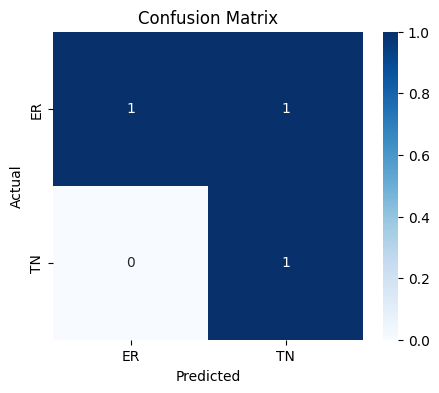

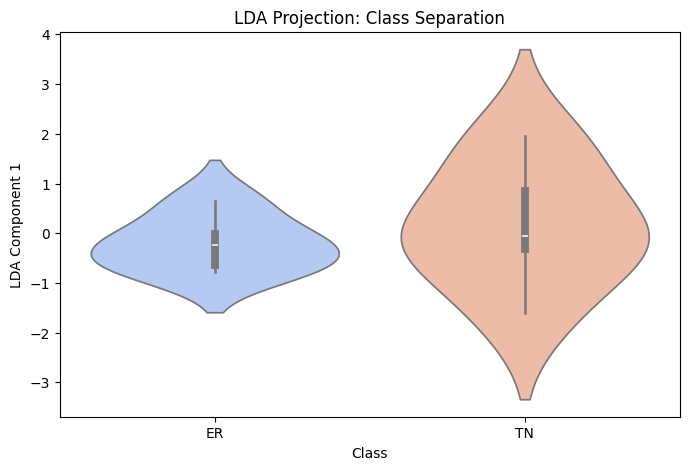

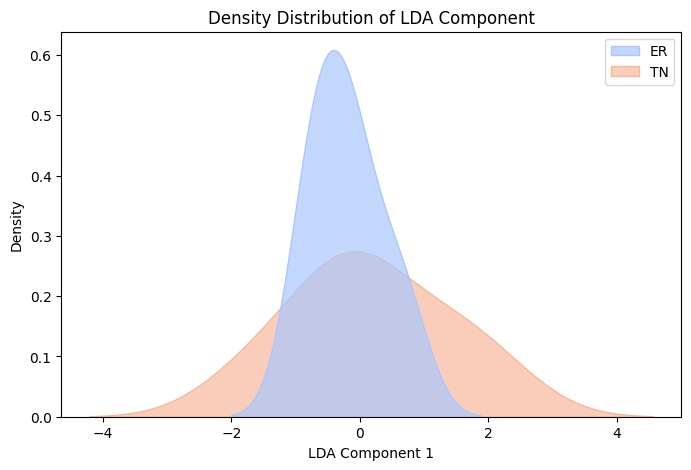

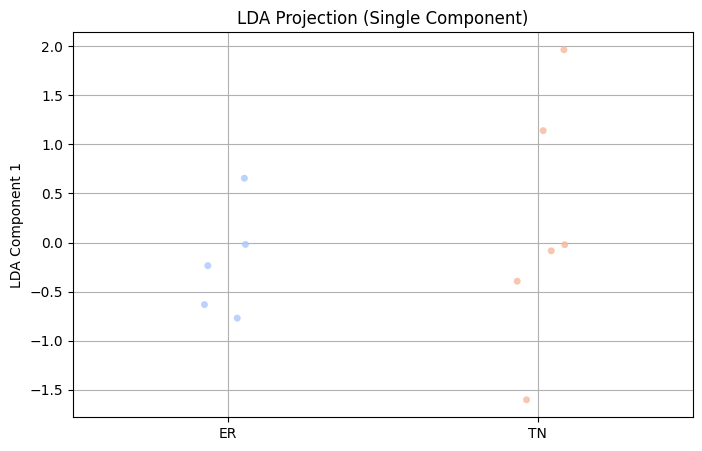

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Load gene expression data
data_url = "https://raw.githubusercontent.com/pine-bio-support/omicslogic/master/PDX_HTSeq_gene_expression.txt"
data = pd.read_csv(data_url, sep="\t", index_col=0)

# Remove genes with all zero expression
data = data.loc[data.sum(axis=1) != 0]

# Extract sample names
names_pdx = data.columns.tolist()

# Define phenotypic classes (adjust based on dataset)
meta_classes = ["ER"] * 7 + ["TN"] * 7  # Modify if dataset size differs

# Create metadata DataFrame
meta_data = pd.DataFrame({"Sample": names_pdx, "Class": meta_classes})
meta_data.set_index("Sample", inplace=True)

# Extract gene expression matrix and labels
X = data.T.values  # Transpose to have samples as rows
y = meta_data.loc[data.columns, "Class"].values  # Match class labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on test set
y_pred = lda.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Transform data into LDA space
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Save transformed data
np.savetxt("X_train_lda.csv", X_train_lda, delimiter=",")
np.savetxt("X_test_lda.csv", X_test_lda, delimiter=",")

# Check number of LDA components
num_components = X_train_lda.shape[1]

# Visualization
plt.figure(figsize=(8, 5))
if num_components == 1:
    # Violin plot for single LDA component
    sns.violinplot(x=y_train, y=X_train_lda[:, 0], hue=y_train, palette="coolwarm", legend=False)
    plt.ylabel("LDA Component 1")
    plt.xlabel("Class")
    plt.title("LDA Projection: Class Separation")
    plt.show()

    # Density plot
    plt.figure(figsize=(8, 5))
    sns.kdeplot(x=X_train_lda[:, 0], hue=y_train, fill=True, common_norm=False, palette="coolwarm", alpha=0.7)
    plt.xlabel("LDA Component 1")
    plt.title("Density Distribution of LDA Component")
    plt.show()

else:
    # 2D Scatter plot for multiple components
    sns.scatterplot(x=X_train_lda[:, 0], y=X_train_lda[:, 1], hue=y_train, palette="coolwarm", alpha=0.8)
    plt.xlabel("LDA Component 1")
    plt.ylabel("LDA Component 2")
    plt.title("LDA Projection of Training Data")
    plt.show()

# Pairplot if multiple LDA components
if num_components > 1:
    lda_df = pd.DataFrame(X_train_lda, columns=[f"LDA {i+1}" for i in range(num_components)])
    lda_df["Class"] = y_train
    sns.pairplot(lda_df, hue="Class", palette="coolwarm", diag_kind="kde")
    plt.show()

# Explained variance plot (if multiple components)
if num_components > 1:
    plt.figure(figsize=(6, 4))
    plt.bar(range(1, num_components + 1), lda.explained_variance_ratio_, alpha=0.7, color="teal")
    plt.xlabel("LDA Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Explained Variance by LDA Components")
    plt.show()


# Visualization
plt.figure(figsize=(8, 5))
if num_components == 1:
    # Use a strip plot if only 1 LDA component
    sns.stripplot(x=y_train, y=X_train_lda[:, 0], hue=y_train, jitter=True, palette="coolwarm", alpha=0.8, legend=False)
    plt.ylabel("LDA Component 1")
    plt.title("LDA Projection (Single Component)")
else:
    # 2D Scatter plot for multiple components
    sns.scatterplot(x=X_train_lda[:, 0], y=X_train_lda[:, 1], hue=y_train, palette="coolwarm", alpha=0.8)
    plt.xlabel("LDA Component 1")
    plt.ylabel("LDA Component 2")
    plt.title("LDA Projection of Training Data")

plt.grid(True)
plt.show()


# **SVM**

Accuracy: 1.00
              precision    recall  f1-score   support

          ER       1.00      1.00      1.00         1
          TN       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



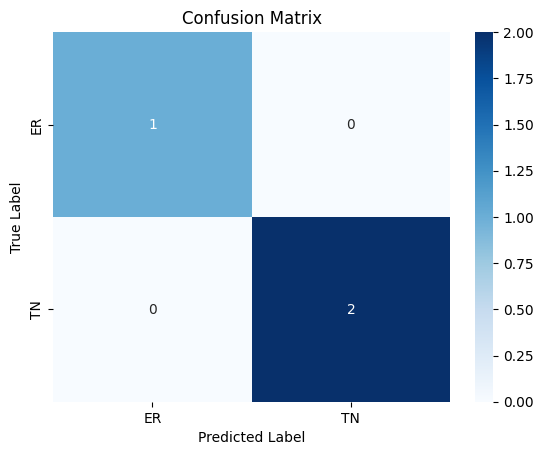

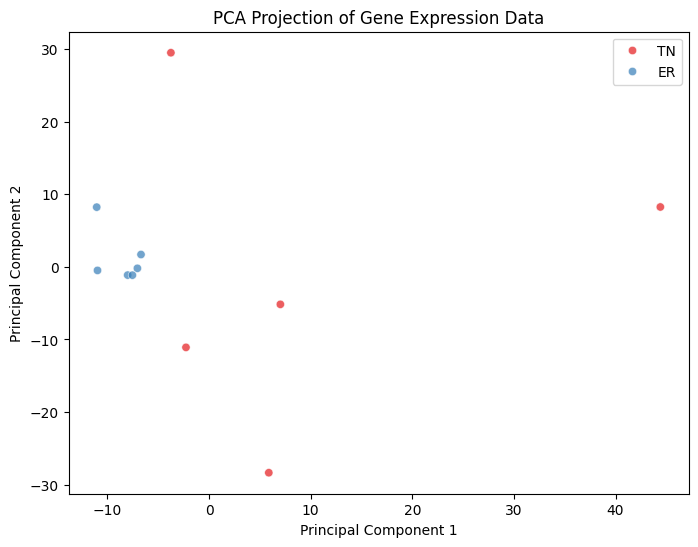

Accuracy: 1.00
              precision    recall  f1-score   support

          ER       1.00      1.00      1.00         1
          TN       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



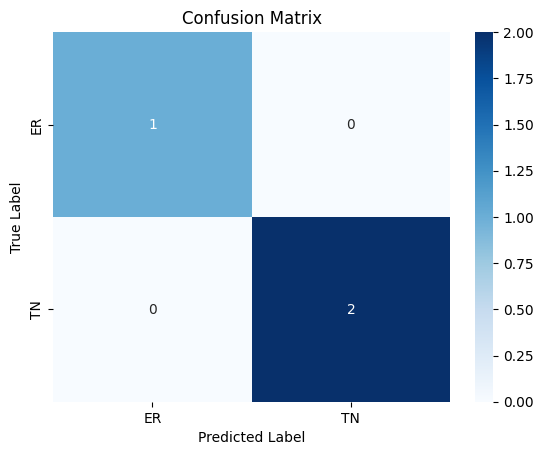

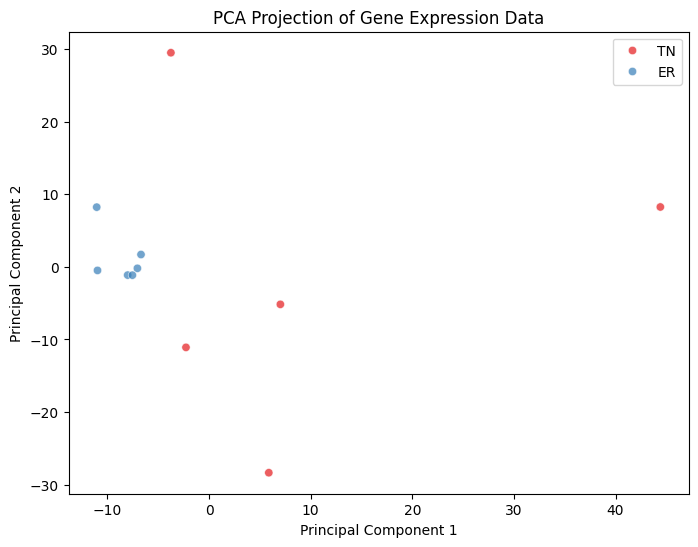

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load gene expression data from URL
data_url = "https://raw.githubusercontent.com/pine-bio-support/omicslogic/master/PDX_HTSeq_gene_expression.txt"
data = pd.read_csv(data_url, sep="\t", index_col=0)  # Assuming tab-separated values

# Remove rows with row sum equal to zero
data = data.loc[data.sum(axis=1) != 0]

# Extract sample names
names_pdx = data.columns.tolist()

# Create sample annotations (phenotypical conditions)
meta_classes = ["ER"] * 7 + ["TN"] * 7  # Adjust based on dataset size

# Create metadata DataFrame
meta_data = pd.DataFrame({"Sample": names_pdx, "Class": meta_classes})
meta_data.set_index("Sample", inplace=True)

# Extract gene expression values and match with class labels
X = data.T.values  # Transpose to match samples as rows
y = meta_data.loc[data.columns, "Class"].values  # Assign class labels based on metadata

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform Support Vector Machine (SVM) classification
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Visualizing data distribution using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette="Set1", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Gene Expression Data")
plt.legend()
plt.show()

# **Random Forest**

Accuracy: 1.00
              precision    recall  f1-score   support

          ER       1.00      1.00      1.00         2
          TN       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



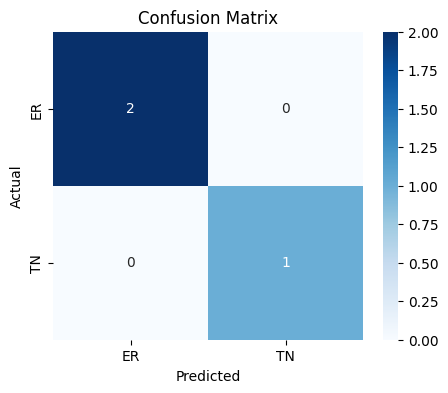

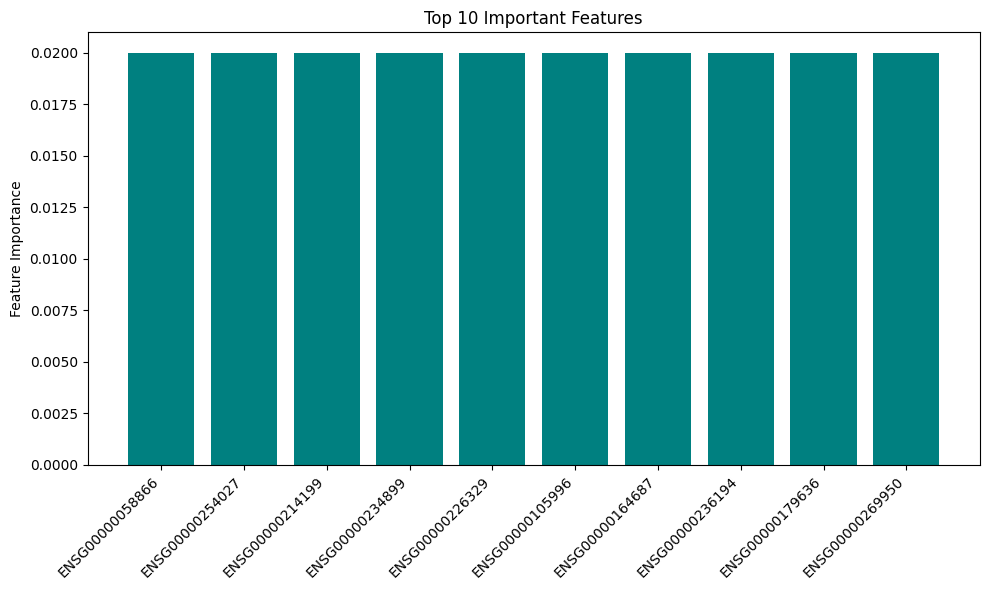

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load gene expression data
data_url = "https://raw.githubusercontent.com/pine-bio-support/omicslogic/master/PDX_HTSeq_gene_expression.txt"
data = pd.read_csv(data_url, sep="\t", index_col=0)

# Remove genes with all zero expression
data = data.loc[data.sum(axis=1) != 0]

# Extract sample names
names_pdx = data.columns.tolist()

# Define phenotypic classes (adjust based on dataset)
meta_classes = ["ER"] * 7 + ["TN"] * 7  # Modify if dataset size differs

# Create metadata DataFrame
meta_data = pd.DataFrame({"Sample": names_pdx, "Class": meta_classes})
meta_data.set_index("Sample", inplace=True)

# Extract gene expression matrix and labels
X = data.T.values  # Transpose to have samples as rows
y = meta_data.loc[data.columns, "Class"].values  # Match class labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize data (optional for Random Forest but done for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature importance visualization
feature_importances = rf.feature_importances_
top_features_idx = np.argsort(feature_importances)[::-1][:10]  # Top 10 important features

# Bar plot of top feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features_idx)), feature_importances[top_features_idx], align="center", color="teal")
plt.xticks(range(len(top_features_idx)), data.index[top_features_idx], rotation=45, ha="right")
plt.ylabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()

# Save predictions
np.savetxt("rf_predictions.csv", y_pred, fmt="%s", delimiter=",")